In [604]:
%matplotlib inline
import os

from nibetaseries.interfaces.nistats import LSABetaSeries, LSSBetaSeries
from nistats.reporting import plot_design_matrix
from nistats import design_matrix as dm
from nistats.hemodynamic_models import glover_hrf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from nilearn.input_data import NiftiLabelsMasker
import nibabel as nib
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import zscore
from nistats.design_matrix import make_first_level_design_matrix

EXAMPLE_BOLD = '../fmriprep/sub-GE120001/ses-pre/func/sub-GE120001_ses-pre_task-taskswitch_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
EXAMPLE_BOLD_MASK = '../fmriprep/sub-GE120001/ses-pre/func/sub-GE120001_ses-pre_task-taskswitch_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
ACTIVATION_ATLAS = '../data/overall_response_atlas.nii.gz'

In [24]:
two_voxel_img = nib.load('./data/bold.nii.gz')
events_df = pd.read_csv('./data/events19.tsv', sep='\t')

In [32]:
two_voxel_data = two_voxel_img.get_fdata()
two_voxel_mask = nib.Nifti1Image(np.array([[[1, 1]]]), two_voxel_img.affine)
metadata = {"RepetitionTime": 2}

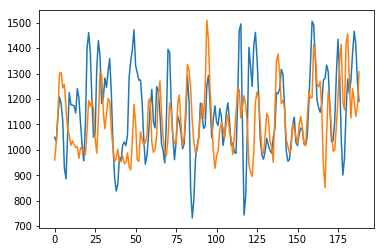

In [27]:
plt.plot(two_voxel_data[0, 0, :, :].T)

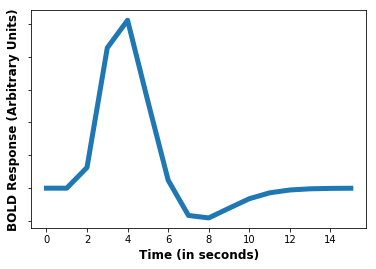

In [549]:
fig, ax = plt.subplots(figsize=(6, 4))
model = glover_hrf(tr=2, oversampling=1)
x = np.arange(0, len(model))
ax.plot(x, model, linewidth=5);
ax.set_yticklabels("");
ax.set_ylabel("BOLD Response (Arbitrary Units)", fontdict={"size": "large", "weight": "heavy"});
ax.set_xlabel("Time (in seconds)", fontdict={"size": "large", "weight": "heavy"});
fig.savefig("./outputs/introduction-hrf.png")

In [269]:
os.chdir('./outputs/lss')
lss_model = LSSBetaSeries(
    bold_file=two_voxel_img, mask_file=two_voxel_mask,
    bold_metadata=metadata, events_file='../../data/events19.tsv',
    hrf_model='glover',
    smoothing_kernel=None,
    high_pass=0.0078125)
lss_res = lss_model.run()
os.chdir('../..')

/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/nibetaseries/interfaces/nistats.py:78: DeprecationWarning: The parameter "mask" will be removed in next release of Nistats. Please use the parameter "mask_img" instead.
  minimize_memory=False,
Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/nistats/regression.py:339: FutureWarning: 'resid' from RegressionResults has been deprecated and will be removed. Please use 'residuals' instead.
  FutureWarning,
Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Compu


Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds

Computing run 1 out of 1 runs (go take a

In [468]:
# pull out beta series
c0_betas_lss1 = nib.load('./outputs/lss/desc-c0_betaseries.nii.gz').get_fdata()[:,:,0,:].squeeze() / 1000
c1_betas_lss1 = nib.load('./outputs/lss/desc-c1_betaseries.nii.gz').get_fdata()[:,:,0,:].squeeze() / 1000
c0_betas_lss2 = nib.load('./outputs/lss/desc-c0_betaseries.nii.gz').get_fdata()[:,:,1,:].squeeze() / 1000
c1_betas_lss2 = nib.load('./outputs/lss/desc-c1_betaseries.nii.gz').get_fdata()[:,:,1,:].squeeze() / 1000

In [501]:
round(np.corrcoef(c0_betas_lss1, c0_betas_lss2)[0,1], 2)

0.25

In [223]:
lss_c0_1 = lss_res.outputs.design_matrices[0].loc[:,"c0":"other"].rename({"c0": "Target Event", "other": "Condition 1", "c1": "Condition 0"}, axis=1)
lss_c0_2 = lss_res.outputs.design_matrices[7].loc[:,"c0":"other"].rename({"c0": "Target Event", "other": "Condition 1", "c1": "Condition 0"}, axis=1)
lss_c0_3 = lss_res.outputs.design_matrices[42].loc[:,"c0":"other"].rename({"c0": "Target Event", "other": "Condition 1", "c1": "Condition 0"}, axis=1)

In [408]:
lss_res.outputs.design_matrices[6].head()

,c0,c1,other,drift_1,drift_2,drift_3,drift_4,drift_5,constant
0.0,0.000000,0.0,0.000000,0.102865,0.102855,0.102837,0.102812,0.102780,1.0
2.0,0.000000,0.0,0.004989,0.102837,0.102741,0.102581,0.102358,0.102071,1.0
4.0,0.000244,0.0,0.042164,0.102780,0.102514,0.102071,0.101451,0.100656,1.0
6.0,0.019212,0.0,0.059843,0.102695,0.102173,0.101306,0.100096,0.098547,1.0
8.0,0.048225,0.0,0.038539,0.102581,0.101720,0.100290,0.098299,0.095758,1.0


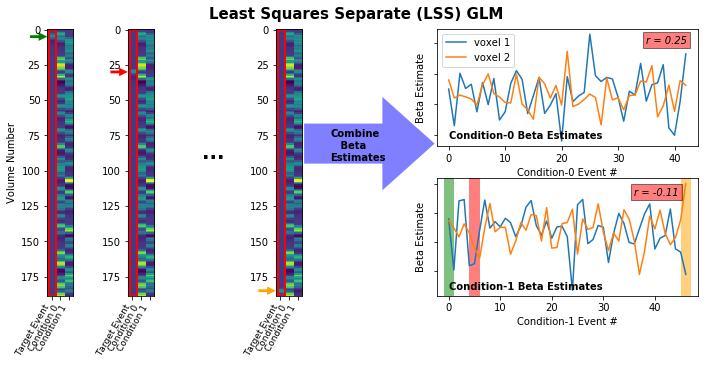

In [542]:
# fig, axes = plt.subplots(ncols=6, figsize=(10, 5),
#                         gridspec_kw={
#                             'width_ratios': [1, 1, 0.5, 1, 1, 10]})
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(ncols=6, nrows=2, figure=fig, width_ratios=[1, 1, 0.5, 1, 1, 10])

ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])
ax3 = fig.add_subplot(gs[:, 2])
ax4 = fig.add_subplot(gs[:, 3])
ax5 = fig.add_subplot(gs[:, 4])
ax6 = fig.add_subplot(gs[0, 5])
ax7 = fig.add_subplot(gs[1, 5])

# create first plot
plot_design_matrix(lss_c0_1, ax=ax1, rescale=False)
# set the parameters for drawing a red box
x = ax1.get_xbound()[0] + 0.2
y = ax1.get_ybound()[1]
width = (ax1.get_xbound()[1] // 2) - 0.2
height = -ax1.get_ybound()[1]
# make the rectangle patch
rect0 = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax1.add_patch(rect0)
ax1.set_ylabel("Volume Number")
ax1.set_xticklabels(ax1.get_xticklabels(), fontdict={'size': 9})
ax1.arrow(-2.5, 5, 1, 0,
          clip_on=False,
          width=2.0,
          head_length=1.0,
          edgecolor='none',
          facecolor='green')

# make the second plot
plot_design_matrix(lss_c0_2, ax=ax2, rescale=False)
rect1 = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax2.add_patch(rect1)
ax2.set_ylabel("");
ax2.set_xticklabels(ax2.get_xticklabels(), fontdict={'size': 9})
ax2.arrow(-2.5, 30, 1, 0,
          clip_on=False,
          width=2.0,
          head_length=1.0,
          edgecolor='none',
          facecolor='red')

# make the third plot (...)
ax3.set_axis_off()
ax3.text(-0.5, 0.5, "...", fontdict={'weight': 'heavy', 'size': 20}, verticalalignment='bottom')

# make the fourth plot
plot_design_matrix(lss_c0_3, ax=ax4, rescale=False)
rect3 = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax4.add_patch(rect3)
ax4.set_ylabel("");
ax4.set_xticklabels(ax4.get_xticklabels(), fontdict={'size': 9})
ax4.arrow(-2.5, 185, 1, 0,
          clip_on=False,
          width=2.0,
          head_length=1.0,
          edgecolor='none',
          facecolor='orange')

# make the fifth plot
ax5.set_axis_off()
ax5.text(-1, 0.5, "Combine\n   Beta\nEstimates", fontdict={'weight': 'heavy'},verticalalignment='bottom')
ax5.arrow(-2, 0.57, 3, 0,
          clip_on=False,
          width=0.15, 
          head_length=2,
          head_width=0.35,
          edgecolor='none',
          facecolor='blue',
          alpha=0.5)

# graph condition 0 betas
lines = ax6.plot(c0_betas_lss1)
lines.extend(ax6.plot(c0_betas_lss2))
ax6.legend(handles=lines, labels=("voxel 1", "voxel 2"))
ax6.set_xlabel("Condition-0 Event #")
ax6.set_ylabel("Beta Estimate")
ax6.set_yticklabels("")
ax6.text(0, -6, "Condition-0 Beta Estimates", fontdict={'weight': 'heavy'}, verticalalignment='bottom')
c0_corr = round(np.corrcoef(c0_betas_lss1, c0_betas_lss2)[0,1], 2)
ax6.text(35, 10, 'r = {}'.format(c0_corr), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})

# graph condition 1 betas
ax7.plot(c1_betas_lss1)
ax7.plot(c1_betas_lss2)
ax7.set_xlabel("Condition-1 Event #")
ax7.set_ylabel("Beta Estimate")
ax7.set_yticklabels("")
ax7.text(0, -8.5, "Condition-1 Beta Estimates", fontdict={'weight': 'heavy'}, verticalalignment='bottom')
# ax7.arrow(0, c1_betas_lss[0]+3, 0, -2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='green')

#ax7.arrow(5, c1_betas_lss[5]-3, 0, 2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='red', zorder=100)


#ax7.arrow(46, c1_betas_lss[46]-3, 0, 2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='orange')

y_pos = ax7.get_ybound()[0]
y_height = ax7.get_ybound()[1] * 2
ax7.add_patch(patches.Rectangle((-1, y_pos), 2, y_height, facecolor='green', alpha=0.5))
ax7.add_patch(patches.Rectangle((4, y_pos), 2, y_height, facecolor='red', alpha=0.5))
ax7.add_patch(patches.Rectangle((45, y_pos), 2, y_height, facecolor='orange', alpha=0.5))

c1_corr = round(np.corrcoef(c1_betas_lss1, c1_betas_lss2)[0,1], 2)
ax7.text(36, 8, 'r = {}'.format(c1_corr), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})

fig.suptitle("Least Squares Separate (LSS) GLM", fontsize=15, fontweight='heavy', x=0.50, y=1.02);
fig.savefig("./outputs/introduction-lss.png", bbox_inches="tight")

In [493]:
ax7.get_ybound()

(-9.236481912799363, 10.933941343664793)

In [270]:
os.chdir('./outputs/lsa')
lsa_model = LSABetaSeries(
    bold_file=two_voxel_img, mask_file=two_voxel_mask,
    bold_metadata=metadata, events_file='../../data/events19.tsv',
    hrf_model='glover',
    smoothing_kernel=None,
    high_pass=0.0078125)
lsa_res = lsa_model.run()
os.chdir('../..')

/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/nibetaseries/interfaces/nistats.py:203: DeprecationWarning: The parameter "mask" will be removed in next release of Nistats. Please use the parameter "mask_img" instead.
  minimize_memory=False,
Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 1 seconds

/home/jdkent/.conda/envs/aim1_valid/lib/python3.7/site-packages/nistats/regression.py:339: FutureWarning: 'resid' from RegressionResults has been deprecated and will be removed. Please use 'residuals' instead.
  FutureWarning,


In [474]:
c0_betas_lsa1 = nib.load('./outputs/lsa/desc-c0_betaseries.nii.gz').get_fdata()[:,:,0,:].squeeze() / 1000
c1_betas_lsa1 = nib.load('./outputs/lsa/desc-c1_betaseries.nii.gz').get_fdata()[:,:,0,:].squeeze() / 1000
c0_betas_lsa2 = nib.load('./outputs/lsa/desc-c0_betaseries.nii.gz').get_fdata()[:,:,1,:].squeeze() / 1000
c1_betas_lsa2 = nib.load('./outputs/lsa/desc-c1_betaseries.nii.gz').get_fdata()[:,:,1,:].squeeze() / 1000

In [65]:
lsa_des = lsa_res.outputs.design_matrices[0].loc[:,"c0_0001":"c1_0047"]

In [477]:
np.corrcoef(c1_betas_lsa1, c1_betas_lsa2)

array([[1.        , 0.37172188],
       [0.37172188, 1.        ]])

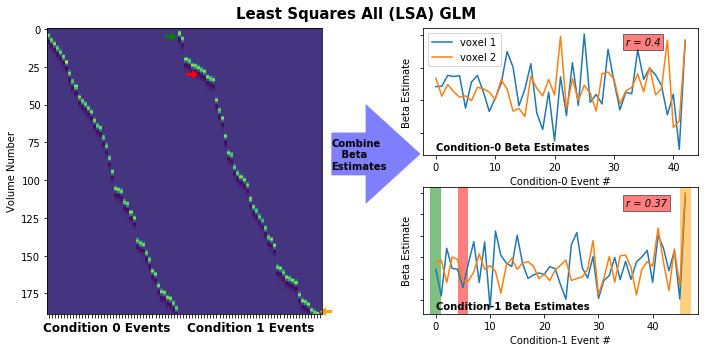

In [548]:
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(ncols=3, nrows=2, figure=fig, width_ratios=[10, 1, 10])

ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])

plot_design_matrix(lsa_des, ax=ax1, rescale=False)
n_labels = len(ax1.get_xticklabels())
new_labels = ['Condition 0 Events' if v == 40 else 'Condition 1 Events' if v == 87 else '' for v in range(n_labels)]
ax1.set_xticklabels(new_labels, fontdict={'fontsize': 'large', 'fontweight': 'heavy'}, rotation=0);
ax1.set_ylabel("Volume Number")

ax1.arrow(38, 5, 2, 0,
          clip_on=False,
          width=2.0,
          head_length=2.0,
          edgecolor='none',
          facecolor='green')

ax1.arrow(45, 30, 2, 0,
          clip_on=False,
          width=2.0,
          head_length=2.0,
          edgecolor='none',
          facecolor='red')

ax1.arrow(93, 187, -2, 0,
          clip_on=False,
          width=2.0,
          head_length=2.0,
          edgecolor='none',
          facecolor='orange')

ax2.set_axis_off()
ax2.text(-1, 0.5, "Combine\n   Beta\nEstimates", fontdict={'weight': 'heavy'},verticalalignment='bottom')
ax2.arrow(-1, 0.56, 1.25, 0,
          clip_on=False,
          width=0.15, 
          head_length=2,
          head_width=0.35,
          edgecolor='none',
          facecolor='blue',
          alpha=0.5)

# graph condition 0 betas
lines = ax3.plot(c0_betas_lsa1)
lines.extend(ax3.plot(c0_betas_lsa2))
ax3.legend(handles=lines, labels=("voxel 1", "voxel 2"))

c0_corr = round(np.corrcoef(c0_betas_lsa1, c0_betas_lsa2)[0,1], 2)
ax3.text(32, 8.5, 'r = {}'.format(c0_corr), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})

ax3.set_xlabel("Condition-0 Event #")
ax3.set_ylabel("Beta Estimate")
ax3.set_yticklabels("")
ax3.text(0, -8, "Condition-0 Beta Estimates", fontdict={'weight': 'heavy'}, verticalalignment='bottom')
# graph condition 1 betas
ax4.plot(c1_betas_lsa1)
ax4.plot(c1_betas_lsa2)
ax4.set_xlabel("Condition-1 Event #")
ax4.set_ylabel("Beta Estimate")
ax4.set_yticklabels("")
ax4.text(0, -7.5, "Condition-1 Beta Estimates", fontdict={'weight': 'heavy'}, verticalalignment='bottom')

#ax4.arrow(0, c1_betas_lsa[0]+3, 0, -2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='green')

#ax4.arrow(5, c1_betas_lsa[5]-3, 0, 2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='red', zorder=100)


#ax4.arrow(46, c1_betas_lsa[46]+3, 0, -2,
#          clip_on=False,
#          width=0.75,
#          head_length=1.25,
#          edgecolor='none',
#          facecolor='orange')

c1_corr = round(np.corrcoef(c1_betas_lsa1, c1_betas_lsa2)[0,1], 2)
ax4.text(35, 17, 'r = {}'.format(c1_corr), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})

y_pos = ax7.get_ybound()[0]
y_height = ax7.get_ybound()[1] * 3
ax4.add_patch(patches.Rectangle((-1, y_pos), 2, y_height, facecolor='green', alpha=0.5))
ax4.add_patch(patches.Rectangle((4, y_pos), 2, y_height, facecolor='red', alpha=0.5))
ax4.add_patch(patches.Rectangle((45, y_pos), 2, y_height, facecolor='orange', alpha=0.5))

fig.suptitle("Least Squares All (LSA) GLM", fontsize=15, fontweight='heavy', x=0.50, y=1.02);
fig.savefig("./outputs/introduction-lsa.png", bbox_inches="tight")

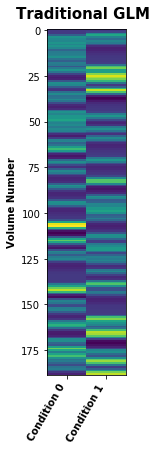

In [528]:
# LSU model (traditional model)
tr = 2
frame_times = np.arange(two_voxel_img.shape[-1]) * tr
lsu_design_matrix = dm.make_first_level_design_matrix(frame_times, events=events_df, high_pass=0.0).loc[:,'c0':'c1']

lsu_design_matrix.rename({"c0": "Condition 0", "c1": "Condition 1"}, axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(2, 6))

plot_design_matrix(lsu_design_matrix, rescale=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), weight="heavy")
ax.set_ylabel("Volume Number", fontdict={"weight": "heavy"});
fig.suptitle("Traditional GLM", fontsize=15, fontweight='heavy', x=0.60, y=1.02);
fig.savefig("./outputs/introduction-normalGLM.png", bbox_inches="tight")

## Show example Simulation/Real Data

In [573]:
masker = NiftiLabelsMasker(ACTIVATION_ATLAS)
real_bold_data = masker.fit_transform(EXAMPLE_BOLD).T

In [574]:
real_bold_data.shape

(21, 471)

In [561]:
fake_bold = nib.load('./data/bold_sim_taskswitch.nii.gz')
fake_bold_data = fake_bold.get_fdata().squeeze()

In [562]:
fake_bold_data.shape

(2, 471)

In [609]:
tr = 2
nvol = 471
frame_times = np.arange(0, nvol * tr, 2)
events_df = pd.read_csv('./data/sub-GE120012_ses-pre_task-taskswitch_events.tsv', sep='\t')
design = make_first_level_design_matrix(frame_times=frame_times, events=events_df, oversampling=1)

In [615]:
predicted_bold = design[['repeat', 'single', 'switch']].sum(axis=1).values

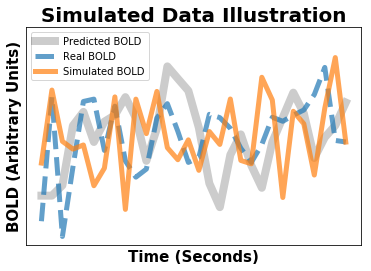

In [674]:
fig, ax = plt.subplots(1, 1)

# set the plots and legend
lines = ax.plot(zscore(predicted_bold[20:50]), color='black', linewidth=8, alpha=0.2)
lines.extend(ax.plot(zscore(real_bold_data[2,20:50]), linewidth=5, linestyle='--', alpha=0.7))
lines.extend(ax.plot(zscore(fake_bold_data[0,20:50]), linewidth=5, alpha=0.7))
ax.legend(handles=lines, labels=("Predicted BOLD", "Real BOLD", "Simulated BOLD"))

# remove the ticks
ax.set_yticks([])
ax.set_xticks([]);

# extend ylim
ax.set_ylim(-3, 3)

# label axes
ax.set_ylabel("BOLD (Arbitrary Units)", fontdict={'size': 15, 'weight': 'heavy'});
ax.set_xlabel("Time (Seconds)", fontdict={'size': 15, 'weight': 'heavy'});
ax.set_title('Simulated Data Illustration', fontdict={'size': 20, 'weight': 'heavy'})
fig.savefig('./outputs/methods-simulation_example.png', dpi=600, bbox_inches='tight')